## Catalogs and parameters

In [2]:
catalog1 = "I/350/gaiaedr3" # Gaia EDR3 (Gaia Collaboration, 2020) I/350/gaiaedr3
catalog1_2 = "I/345/gaia2" # Gaia DR2 (Gaia Collaboration, 2018) I/345/gaia2
catalog1_3 = "I/337/gaia" # Gaia DR1 (Gaia Collaboration, 2016) I/337/gaia
catalog2 = "I/305/out" # The Guide Star Catalog, Version 2.3.2 (GSC2.3) (STScI, 2006) I/305/out
catalog2_2 = "I/271/out" # The GSC 2.2 Catalogue (STScI, 2001) I/271/out
catalog2_3 = "II/272/gspc24" # Guide Star Photometric Catalog V2.4 (Bucciarelli+ 2001) II/272/gspc24
catalog3 = "II/246/out" # 2MASS All-Sky Catalog of Point Sources (Cutri+ 2003) II/246/out
catalog4 = "II/348/vvv2" # VISTA Variable in the Via Lactea Survey DR2 (Minniti+, 2017) II/348/vvv2
catalog5 = "J/A+A/631/A20/central" # GALACTICNUCLEUS JHKs imaging survey. II. (Nogueras-Lara+, 2019) J/A+A/631/A20/central
catalog6 = "/home/omiya/jasmine_targetlist/SIRIUS/WGCCatAll.dat" # SIRIUS catalog from Kataza-san
catalog7 = "/home/omiya/jasmine_targetlist/xmatch_gaiaedr3_2MASS.csv" # GAIA EDR3 and 2MASS crossmatched on https://gea.esac.esa.int/archive/ ("SEARCH" and "Adbanced (ADQL)" tabs) with following command:

# select * FROM gaiaedr3.gaia_source AS gaia
# INNER JOIN gaiaedr3.tmass_psc_xsc_best_neighbour AS xmatch
#  ON gaia.source_id = xmatch.source_id
# INNER JOIN gaiadr1.tmass_original_valid AS tmass
#  ON tmass.tmass_oid = xmatch.clean_tmass_psc_xsc_oid
# WHERE gaia.ra < 267.8560754730241 AND gaia.ra > 264.3560754730241 AND gaia.dec > -31.11261680900919 AND gaia.dec < -27.61261680900919 

import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier

# position of key center
lcenter = 0
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree] # [266.4049882865447, -28.936177761791473] l=0, b=0
print(sky_org)
width = 0.4

Vizier.ROW_LIMIT = -1
Vizier.TIMEOUT = 1800
Vizier.VIZIER_SERVER = "vizier.u-strasbg.fr"
Vizier.VIZIER_SERVER = "vizier.nao.ac.jp"

# hw = h + 0.75 * (j-h) - 0.027 * (j-h) * (j-h)
## T. Yano, 2021 spring ASJ annual meeting V243a

[266.4049882865447, -28.936177761791473]


## GAIA

In [4]:
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier

lcenter = 0
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree] # [266.10607547, -29.36261681] l=-0.5, b=0
print(sky_org)
width = 0.4

Vizier.ROW_LIMIT = -1
Vizier.TIMEOUT = 1800
Vizier.VIZIER_SERVER = "vizier.u-strasbg.fr"
Vizier.VIZIER_SERVER = "vizier.nao.ac.jp"

catalog = "I/350/gaiaedr3" # Gaia EDR3 (Gaia Collaboration, 2020) I/350/gaiaedr3
database = Vizier(columns=['*', 'GLON', 'GLAT'],row_limit=-1).query_region(SkyCoord(ra=sky_org[0]*u.degree, dec=sky_org[1]*u.degree, frame='icrs'), width=width*u.degree, catalog=catalog)
print(len(database[catalog]))

table_pd = database[catalog].to_pandas()
table_pd.head()

[266.4049882865447, -28.936177761791473]
14406


,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,PM,pmRA,e_pmRA,...,SDSSDR13,SkyMapper2,URAT1,GmagCorr,e_GmagCorr,FGCorr,RAJ2000,DEJ2000,GLON,GLAT
0,266.296806,14.8761,-29.135035,9.7728,4057104070060689280,NaN,NaN,NaN,NaN,NaN,...,<NA>,<NA>,<NA>,20.943241,0.015631,79.003998,266.296806,-29.135035,359.780990,-0.022975
1,266.294476,2.3699,-29.135177,1.7434,4057104074345828736,NaN,NaN,NaN,NaN,NaN,...,<NA>,<NA>,<NA>,20.644325,0.009537,104.040001,266.294476,-29.135177,359.779807,-0.021313
2,266.295908,0.0418,-29.134110,0.0336,4057104074348007808,0.4910,0.0459,3.394,-0.052,0.050,...,<NA>,164532442,<NA>,15.546850,0.002782,11382.000000,266.295908,-29.134095,359.781370,-0.021824
3,266.275460,0.3111,-29.133310,0.2450,4057104104409847040,0.4692,0.3106,0.260,-0.150,0.376,...,<NA>,164532424,<NA>,18.875690,0.003560,530.479980,266.275461,-29.133311,359.772731,-0.006171
4,266.273611,1.9220,-29.133917,2.2113,4057104108705564288,NaN,NaN,NaN,NaN,NaN,...,<NA>,<NA>,<NA>,20.651226,0.008525,103.379997,266.273611,-29.133917,359.771370,-0.005109


In [5]:
table_pd.to_csv('gaiaedr3_v1.csv')
pd_gaiaedr3 = table_pd
pd_gaiaedr3["GLON"] = np.where(pd_gaiaedr3["GLON"]>180, pd_gaiaedr3["GLON"]-360, pd_gaiaedr3["GLON"])
pd_gaiaedr3.tail()

,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,PM,pmRA,e_pmRA,...,SDSSDR13,SkyMapper2,URAT1,GmagCorr,e_GmagCorr,FGCorr,RAJ2000,DEJ2000,GLON,GLAT
14401,266.259957,0.7018,-28.740781,0.5462,4057542126648999296,0.2755,0.6345,3.722,-3.719,0.735,...,<NA>,164548044,<NA>,20.073331,0.005399,176.039993,266.259976,-28.740782,0.100450,0.210309
14402,266.254121,1.1961,-28.743824,0.9806,4057542126649000320,1.1259,0.7238,8.541,-6.916,1.286,...,<NA>,164547970,<NA>,20.148094,0.005384,164.330002,266.254156,-28.743802,0.095183,0.213084
14403,266.257370,0.0213,-28.738221,0.0162,4057542126655543296,0.7610,0.0249,2.763,0.017,0.026,...,<NA>,164548052,<NA>,14.597526,0.002764,27286.000000,266.257370,-28.738209,0.101449,0.213580
14404,266.257230,21.4004,-28.742736,14.2429,4057542126658278016,NaN,NaN,NaN,NaN,NaN,...,<NA>,<NA>,<NA>,21.014540,0.029186,73.983002,266.257230,-28.742736,0.097535,0.211328
14405,266.254639,37.9178,-28.742269,21.1011,4057542126660123648,NaN,NaN,NaN,NaN,NaN,...,<NA>,<NA>,<NA>,21.100494,0.026596,68.351997,266.254639,-28.742269,0.096747,0.213509


## 2MASS

In [6]:
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier

lcenter = 0
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree] # [266.10607547, -29.36261681] l=-0.5, b=0
print(sky_org)
width = 0.4

Vizier.ROW_LIMIT = -1
Vizier.TIMEOUT = 1800
Vizier.VIZIER_SERVER = "vizier.u-strasbg.fr"
Vizier.VIZIER_SERVER = "vizier.nao.ac.jp"

catalog = "II/246/out" # 2MASS All-Sky Catalog of Point Sources (Cutri+ 2003) II/246/out
database = Vizier(columns=['*', 'GLON', 'GLAT'],row_limit=-1).query_region(SkyCoord(ra=sky_org[0]*u.degree, dec=sky_org[1]*u.degree, frame='icrs'), width=width*u.degree, catalog=catalog)
print(len(database[catalog]))

table_pd = database[catalog].to_pandas()
table_pd.head()


[266.4049882865447, -28.936177761791473]
30930


,RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg,GLON,GLAT
0,266.186986,-29.126373,17444487-2907349,14.698000,0.048,12.074,NaN,9.860,NaN,BUU,266,200,c00,0,0,359.738,0.063
1,266.178897,-29.132751,17444293-2907579,16.986000,NaN,11.727,0.025,9.148,0.024,UAA,022,011,000,0,0,359.729,0.066
2,266.184163,-29.130548,17444419-2907499,17.531000,NaN,14.051,NaN,11.944,0.033,UUA,002,001,000,0,0,359.733,0.063
3,266.179285,-29.127317,17444302-2907383,15.622000,0.066,11.695,0.039,9.662,0.034,DAA,222,111,000,0,0,359.734,0.069
4,266.177438,-29.132130,17444258-2907556,16.997999,NaN,14.202,NaN,12.118,0.064,UUA,002,001,00c,0,0,359.729,0.068


In [7]:
table_pd.to_csv('twomass_v1.csv')
pd_2mass = table_pd
pd_2mass["GLON"] = np.where(pd_2mass["GLON"]>180, pd_2mass["GLON"]-360, pd_2mass["GLON"])
table_pd.tail()

,RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg,GLON,GLAT
30925,266.626998,-28.740725,17463047-2844266,14.239000,0.023,12.985,0.021,12.573,0.039,AAE,222,111,000,0,0,0.268,-0.064
30926,266.626204,-28.746494,17463028-2844473,16.611000,NaN,12.248,0.042,10.045,0.033,UAA,022,011,000,0,0,0.263,-0.067
30927,266.631010,-28.736263,17463144-2844105,17.823000,NaN,15.434,NaN,13.905,0.116,UUD,002,001,00c,0,0,0.274,-0.065
30928,266.632705,-28.744921,17463184-2844417,17.327999,NaN,14.016,NaN,11.405,0.043,UUE,002,001,00c,0,0,0.267,-0.071
30929,266.631450,-28.743923,17463154-2844381,15.460000,NaN,14.300,NaN,11.148,0.059,UUE,002,001,000,0,0,0.267,-0.069


## GSC2.3

In [8]:
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier

lcenter = 0
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree] # [266.10607547, -29.36261681] l=-0.5, b=0
print(sky_org)
width = 0.4

Vizier.ROW_LIMIT = -1
Vizier.TIMEOUT = 1800
Vizier.VIZIER_SERVER = "vizier.u-strasbg.fr"
Vizier.VIZIER_SERVER = "vizier.nao.ac.jp"

catalog = "I/305/out" # The Guide Star Catalog, Version 2.3.2 (GSC2.3) (STScI, 2006) I/305/out
database = Vizier(columns=['*', 'GLON', 'GLAT'],row_limit=-1).query_region(SkyCoord(ra=sky_org[0]*u.degree, dec=sky_org[1]*u.degree, frame='icrs'), width=width*u.degree, catalog=catalog)
print(len(database[catalog]))

table_pd = database[catalog].to_pandas()
table_pd.head()


[266.4049882865447, -28.936177761791473]
6706


,GSC2.3,RAJ2000,DEJ2000,Epoch,Fmag,jmag,Vmag,Nmag,Class,a,e
0,S8DM024865,266.520575,-28.744313,1996.678,16.040001,17.760000,16.620001,15.150000,0,3.27,0.17
1,S8DM024935,266.545131,-28.741140,1996.678,17.510000,20.070000,NaN,16.600000,3,2.24,0.07
2,S8DM027379,266.514415,-28.737027,1975.373,NaN,19.200001,18.010000,NaN,3,2.31,0.16
3,S8DM024732,266.526307,-28.748569,1996.678,16.980000,19.889999,18.049999,15.520000,3,2.54,0.12
4,S8DM035870,266.524213,-28.744050,1975.373,NaN,21.840000,NaN,17.190001,3,1.41,0.07


In [9]:
table_pd.to_csv('gsc_v1.csv')
pd_gsc = table_pd
#pd_gsc["GLON"] = np.where(pd_gsc["GLON"]>180, pd_gsc["GLON"]-360, pd_gsc["GLON"])
table_pd.tail()

,GSC2.3,RAJ2000,DEJ2000,Epoch,Fmag,jmag,Vmag,Nmag,Class,a,e
6701,S8DO059664,266.622067,-28.995927,1996.678,16.350000,17.889999,17.070000,15.080000,3,3.09,0.16
6702,S8DO092252,266.621035,-28.975666,1975.373,NaN,14.070000,NaN,NaN,0,11.92,0.46
6703,S8DO092398,266.583383,-28.955397,1975.373,NaN,22.090000,NaN,NaN,3,1.51,0.35
6704,S8DO060424,266.612466,-28.962594,1996.678,15.600000,16.850000,16.379999,14.440000,3,4.88,0.46
6705,S8DO060945,266.631078,-28.934832,1996.678,18.110001,19.950001,NaN,16.629999,3,1.74,0.40


In [10]:
import multiprocessing as mp
from multiprocessing import Process
from multiprocessing import Pool
import tqdm

def calc_galcoord(ra, dec):
    obj_radec = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
    return obj_radec.galactic.l.degree, obj_radec.galactic.b.degree

In [11]:
args = list(zip(pd_gsc["RAJ2000"].values, pd_gsc["DEJ2000"].values))
p = Pool(mp.cpu_count())
result = list(tqdm.tqdm(p.starmap(calc_galcoord, args)))

obj_l_gsc = np.array(result)[:,0]
obj_b_gsc = np.array(result)[:,1]
print(obj_l_gsc)
print(obj_b_gsc)
obj_l_gsc = np.where(obj_l_gsc>180, obj_l_gsc-360, obj_l_gsc)

100%|██████████| 6706/6706 [00:00<00:00, 2050820.46it/s]

[0.2165249  0.23043314 0.21993761 ... 0.06482538 0.07189947 0.10408227]
[ 0.01344074 -0.00329805  0.02184379 ... -0.14330794 -0.16878904
 -0.16828422]


## VVV

In [12]:
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier

lcenter = 0
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree] # [266.10607547, -29.36261681] l=-0.5, b=0
print(sky_org)
width = 0.4

Vizier.ROW_LIMIT = -1
Vizier.TIMEOUT = 1800
Vizier.VIZIER_SERVER = "vizier.u-strasbg.fr"
Vizier.VIZIER_SERVER = "vizier.nao.ac.jp"

catalog = "II/348/vvv2" # VISTA Variable in the Via Lactea Survey DR2 (Minniti+, 2017) II/348/vvv2
database = Vizier(columns=['*', 'GLON', 'GLAT'],row_limit=-1).query_region(SkyCoord(ra=sky_org[0]*u.degree, dec=sky_org[1]*u.degree, frame='icrs'), width=width*u.degree, catalog=catalog)
print(len(database[catalog]))

table_pd = database[catalog].to_pandas()
table_pd.head()


[266.4049882865447, -28.936177761791473]
173952


,RAJ2000,DEJ2000,iauname,mClass,Zmag3,e_Zmag3,Zperrbits,Ymag3,e_Ymag3,Yperrbits,...,e_Jmag3,Jperrbits,Hmag3,e_Hmag3,Hperrbits,Ksmag3,e_Ksmag3,Ksperrbits,GLON,GLAT
0,266.273975,-29.134491,VVV J174505.75-290804.16,-1,19.033001,0.086,16,18.348,0.089,16,...,NaN,0,NaN,NaN,0,NaN,NaN,0,359.771044,-0.005680
1,266.289913,-29.132907,VVV J174509.57-290758.46,1,NaN,NaN,0,NaN,NaN,0,...,NaN,0,15.051,0.037,16,12.562,0.013,0,359.779661,-0.016729
2,266.294515,-29.135126,VVV J174510.68-290806.45,1,18.482000,0.053,0,17.968,0.063,0,...,0.055,16,NaN,NaN,0,NaN,NaN,0,359.779866,-0.021315
3,266.285195,-29.128524,VVV J174508.44-290742.68,-1,14.216000,0.003,0,13.801,0.003,0,...,0.003,16,13.051,0.006,16,12.500,0.012,16,359.781249,-0.010925
4,266.293748,-29.129641,VVV J174510.49-290746.70,-1,17.896999,0.032,0,15.399,0.008,0,...,0.002,16,10.490,0.002,65552,10.484,0.002,65552,359.784196,-0.017882


In [13]:
table_pd.to_csv('vvv_v1.csv')
pd_vvv = table_pd
pd_vvv["GLON"] = np.where(pd_vvv["GLON"]>180, pd_vvv["GLON"]-360, pd_vvv["GLON"])
table_pd.tail()

,RAJ2000,DEJ2000,iauname,mClass,Zmag3,e_Zmag3,Zperrbits,Ymag3,e_Ymag3,Yperrbits,...,e_Jmag3,Jperrbits,Hmag3,e_Hmag3,Hperrbits,Ksmag3,e_Ksmag3,Ksperrbits,GLON,GLAT
173947,266.280436,-28.738448,VVV J174507.30-284418.41,-2,NaN,NaN,0,NaN,NaN,0,...,NaN,0,NaN,NaN,0,14.834,0.104,16,0.111812,0.196211
173948,266.276643,-28.742868,VVV J174506.39-284434.32,-2,NaN,NaN,0,NaN,NaN,0,...,NaN,0,NaN,NaN,0,14.216,0.059,16,0.106305,0.196741
173949,266.287245,-28.736380,VVV J174508.93-284410.96,-1,NaN,NaN,0,NaN,NaN,0,...,0.213,0,15.291,0.047,16,13.352,0.027,16,0.116691,0.192198
173950,266.241601,-28.736086,VVV J174457.98-284409.90,-1,NaN,NaN,0,NaN,NaN,0,...,0.130,16,NaN,NaN,0,13.749,0.038,16,0.096048,0.226488
173951,266.243041,-28.736620,VVV J174458.32-284411.83,1,NaN,NaN,0,NaN,NaN,0,...,NaN,0,NaN,NaN,0,14.812,0.102,16,0.096252,0.225132


## GALACTICNUCLEUS

In [14]:
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier

lcenter = 0
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree] # [266.10607547, -29.36261681] l=-0.5, b=0
print(sky_org)
width = 0.4

Vizier.ROW_LIMIT = -1
Vizier.TIMEOUT = 1800
Vizier.VIZIER_SERVER = "vizier.u-strasbg.fr"
Vizier.VIZIER_SERVER = "vizier.nao.ac.jp"

catalog = "J/A+A/631/A20/central" # GALACTICNUCLEUS JHKs imaging survey. II. (Nogueras-Lara+, 2019) J/A+A/631/A20/central
database = Vizier(columns=['*', 'GLON', 'GLAT'],row_limit=-1).query_region(SkyCoord(ra=sky_org[0]*u.degree, dec=sky_org[1]*u.degree, frame='icrs'), width=width*u.degree, catalog=catalog)
print(len(database[catalog]))

table_pd = database[catalog].to_pandas()
table_pd.head()

[266.4049882865447, -28.936177761791473]
1428385


,RAJ2000,e_RAJ2000,DEJ2000,e_DEJ2000,RAJdeg,e_RAJdeg,DEJdeg,e_DEJdeg,RAHdeg,e_RAHdeg,...,e_DEKsdeg,Jmag,e_Jmag,Hmag,e_Hmag,Ksmag,e_Ksmag,iJ,iH,iKs
0,266.46716,0.002594,-28.967893,0.003231,266.46716,0.007493,-28.967895,0.009593,266.46716,0.003004,...,0.005578,11.35489,0.00830,10.66565,0.00812,10.4088,0.00628,4,3,3
1,266.46735,0.001946,-28.967538,0.002423,266.46735,0.009573,-28.967540,0.012041,266.46735,0.007493,...,0.005988,12.14799,0.00886,11.72075,0.00742,11.5557,0.00722,4,4,4
2,266.47372,0.000649,-28.977522,0.000808,266.47372,0.005712,-28.977523,0.007212,266.47372,0.004672,...,0.008458,13.81349,0.00814,12.69735,0.00697,12.3396,0.01101,4,4,4
3,266.47858,0.005837,-28.963477,0.007270,266.47858,0.002419,-28.963481,0.002845,266.47858,0.005717,...,0.004150,14.06349,0.00561,13.52395,0.01461,13.4107,0.00799,3,4,3
4,266.47314,0.003243,-28.966582,0.004039,266.47314,0.001775,-28.966579,0.002362,266.47314,0.007796,...,0.008437,14.61249,0.01082,13.84815,0.01387,13.6209,0.00576,4,4,4


In [15]:
table_pd.to_csv('galacticnucleus_v1.csv')
pd_galacticnucleus = table_pd
#pd_gln["GLON"] = np.where(pd_gln["GLON"]>180, pd_gln["GLON"]-360, pd_gln["GLON"])
table_pd.tail()

,RAJ2000,e_RAJ2000,DEJ2000,e_DEJ2000,RAJdeg,e_RAJdeg,DEJdeg,e_DEJdeg,RAHdeg,e_RAHdeg,...,e_DEKsdeg,Jmag,e_Jmag,Hmag,e_Hmag,Ksmag,e_Ksmag,iJ,iH,iKs
1428380,266.45807,0.0,-29.130516,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.8446,0.08228,0,0,1
1428381,266.47299,0.0,-29.112158,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.0663,0.03798,0,0,1
1428382,266.46201,0.0,-29.126995,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.0378,0.05283,0,0,1
1428383,266.47119,0.0,-29.111788,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.8105,0.11116,0,0,1
1428384,266.46652,0.0,-29.127047,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.9766,0.08209,0,0,1


In [16]:
import multiprocessing as mp
from multiprocessing import Process
from multiprocessing import Pool
import tqdm

def calc_galcoord(ra, dec):
    obj_radec = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
    return obj_radec.galactic.l.degree, obj_radec.galactic.b.degree

In [17]:
# args = list(zip(pd_galacticnucleus["RAJ2000"].values, pd_galacticnucleus["DEJ2000"].values))
# p = Pool(mp.cpu_count())
# result = list(tqdm.tqdm(p.starmap(calc_galcoord, args)))

# obj_l_galacticnucleus = np.array(result)[:,0]
# obj_b_galacticnucleus = np.array(result)[:,1]
# print(obj_l_galacticnucleus)
# print(obj_b_galacticnucleus)
# obj_l_galacticnucleus = np.where(obj_l_galacticnucleus>180, obj_l_galacticnucleus-360, obj_l_galacticnucleus)

## SIRIUS

In [18]:
import pandas as pd
catalog = "SIRIUS/WGCCatAll.dat" # SIRIUS catalog from Kataza-san
pd_sirius = pd.read_table(catalog, delim_whitespace=True, header=0, usecols=[0,1, 2, 3, 6, 7, 10, 11, 14, 15], names=["l", "b", "RAJ2000", "DECJ2000", "J_Mag", "J_Error", "H_Mag", "H_Error", "K_Mag", "K_Error"])
print(len(pd_sirius))
pd_sirius.head()

12227262


,l,b,RAJ2000,DECJ2000,J_Mag,J_Error,H_Mag,H_Error,K_Mag,K_Error
0,-3.157748,0.190609,17:37:08.331,-31:30:55.55,0.0,0.0,0.000,0.000,15.704,0.088
1,-3.157233,0.192537,17:37:07.951,-31:30:50.26,0.0,0.0,0.000,0.000,15.397,0.064
2,-3.156974,0.189787,17:37:08.643,-31:30:54.79,0.0,0.0,0.000,0.000,15.469,0.104
3,-3.156722,0.189990,17:37:08.633,-31:30:53.63,0.0,0.0,0.000,0.000,15.544,0.106
4,-3.156294,0.191538,17:37:08.330,-31:30:49.34,0.0,0.0,16.667,0.092,0.000,0.000


In [19]:
import pandas as pd
min_l = -0.3
max_l = 0.3
min_b = -0.3
max_b = 0.3
pd_sirius_jsky = pd_sirius.query( '@min_l <= l <= @max_l and @min_b <= b <= @max_b')
print(len(pd_sirius_jsky))
pd_sirius_jsky.to_csv('sirius_v1.csv')
pd_sirius_jsky.head()

532496


,l,b,RAJ2000,DECJ2000,J_Mag,J_Error,H_Mag,H_Error,K_Mag,K_Error
5277974,-0.299998,0.071442,17:44:37.485,-29:09:17.21,15.935,0.031,13.105,0.076,11.524,0.027
5277978,-0.299997,-0.196370,17:45:40.310,-29:17:40.36,0.000,0.000,0.000,0.000,14.940,0.079
5277986,-0.299995,0.265782,17:43:52.004,-29:03:10.93,0.000,0.000,15.402,0.058,13.843,0.112
5277987,-0.299995,-0.216784,17:45:45.106,-29:18:18.63,0.000,0.000,16.052,0.073,14.197,0.120
5277988,-0.299995,0.152985,17:44:18.391,-29:06:43.63,0.000,0.000,13.403,0.025,11.935,0.022


## Xmatch GAIA EDR3 and 2MASS

In [20]:
import pandas as pd
catalog = "xmatch_gaiaedr3_2MASS.csv" # GAIA EDR3 and 2MASS crossmatched on https://gea.esac.esa.int/archive/
pd_gaia2mass = pd.read_csv(catalog)
print(len(pd_gaia2mass))
pd_gaia2mass.head()

968048


,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,err_min,err_ang,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,ext_key,j_date
0,1636042515805110273,Gaia EDR3 4055138211979398528,4055138211979398528,804015869,2016.0,265.495265,0.089635,-31.111450,0.064479,0.620708,...,0.06,90,13.838,0.030,13.289,0.029,13.251,0.038,NaN,2.451543e+06
1,1636042515805110273,Gaia EDR3 4055138211979401216,4055138211979401216,798552414,2016.0,265.497613,0.178940,-31.110451,0.133959,0.687452,...,0.06,90,14.617,0.041,14.078,0.049,13.831,0.051,NaN,2.451309e+06
2,1636042515805110273,Gaia EDR3 4055138211988413056,4055138211988413056,1452809151,2016.0,265.492379,0.332440,-31.111260,0.239670,0.719444,...,0.06,45,14.406,0.088,13.137,0.084,12.682,0.058,NaN,2.451036e+06
3,1636042515805110273,Gaia EDR3 4055138211992043776,4055138211992043776,1777900121,2016.0,265.490141,0.231816,-31.110586,0.170252,0.341196,...,0.06,45,14.794,0.033,14.166,0.042,14.099,0.060,NaN,2.451659e+06
4,1636042515805110273,Gaia EDR3 4055138216280817536,4055138216280817536,1058659701,2016.0,265.496247,0.028759,-31.105933,0.020992,1.095305,...,0.06,45,14.571,0.035,13.594,0.034,13.276,0.027,NaN,2.451036e+06


In [21]:
# hw = h + 0.75 * (j-h) - 0.027 * (j-h) * (j-h)
# T. Yano, 2021 spring ASJ annual meeting V243a

pd_gaia2mass["Hw"] = pd_gaia2mass["h_m"] + 0.75 * (pd_gaia2mass["j_m"]-pd_gaia2mass["h_m"]) - 0.027 * (pd_gaia2mass["j_m"]-pd_gaia2mass["h_m"]) * (pd_gaia2mass["j_m"]-pd_gaia2mass["h_m"])
pd_gaia2mass.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,err_ang,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,ext_key,j_date,Hw
0,1636042515805110273,Gaia EDR3 4055138211979398528,4055138211979398528,804015869,2016.0,265.495265,0.089635,-31.111450,0.064479,0.620708,...,90,13.838,0.030,13.289,0.029,13.251,0.038,NaN,2.451543e+06,13.692612
1,1636042515805110273,Gaia EDR3 4055138211979401216,4055138211979401216,798552414,2016.0,265.497613,0.178940,-31.110451,0.133959,0.687452,...,90,14.617,0.041,14.078,0.049,13.831,0.051,NaN,2.451309e+06,14.474406
2,1636042515805110273,Gaia EDR3 4055138211988413056,4055138211988413056,1452809151,2016.0,265.492379,0.332440,-31.111260,0.239670,0.719444,...,45,14.406,0.088,13.137,0.084,12.682,0.058,NaN,2.451036e+06,14.045270
3,1636042515805110273,Gaia EDR3 4055138211992043776,4055138211992043776,1777900121,2016.0,265.490141,0.231816,-31.110586,0.170252,0.341196,...,45,14.794,0.033,14.166,0.042,14.099,0.060,NaN,2.451659e+06,14.626352
4,1636042515805110273,Gaia EDR3 4055138216280817536,4055138216280817536,1058659701,2016.0,265.496247,0.028759,-31.105933,0.020992,1.095305,...,45,14.571,0.035,13.594,0.034,13.276,0.027,NaN,2.451036e+06,14.300978


In [22]:
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
pd_gaia2mass["l"] = np.where(pd_gaia2mass["l"] >180, pd_gaia2mass["l"] -360, pd_gaia2mass["l"] )
lcenter = 0
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree] # [266.10607547, -29.36261681] l=-0.5, b=0
print(sky_org)
width = 0.4

min_ra = sky_org[0] - width/2
max_ra = sky_org[0] + width/2
min_dec = sky_org[1] - width/2
max_dec = sky_org[1] + width/2
pd_gaia2mass_jsky = pd_gaia2mass.query( '@min_ra <= ra <= @max_ra and @min_dec <= dec <= @max_dec')
pd_gaia2mass_jsky.to_csv('xmatch_gaiaedr3_2MASS_v1.csv')
print(len(pd_gaia2mass_jsky))
pd_gaia2mass_jsky.head()

[266.4049882865447, -28.936177761791473]
5838


,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,err_ang,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,ext_key,j_date,Hw
255840,1636042515805110273,Gaia EDR3 4057491785337484800,4057491785337484800,685063118,2016.0,266.524011,1.127877,-28.802103,0.868271,NaN,...,17,15.499,0.060,15.298,0.105,15.021,0.139,NaN,2.451341e+06,15.447659
256172,1636042515805110273,Gaia EDR3 4057491407381003904,4057491407381003904,1560688780,2016.0,266.599831,0.209285,-28.781090,0.165850,0.487944,...,45,14.836,0.042,14.317,0.046,14.252,0.068,NaN,2.450989e+06,14.698977
256173,1636042515805110273,Gaia EDR3 4057491407381004544,4057491407381004544,952272300,2016.0,266.604849,0.147148,-28.780638,0.116694,0.527925,...,4,14.972,0.055,14.374,0.064,14.198,0.083,NaN,2.451014e+06,14.812845
256174,1636042515805110273,Gaia EDR3 4057491407381004928,4057491407381004928,200730289,2016.0,266.595519,0.197902,-28.780303,0.156827,0.471245,...,45,15.111,0.032,14.824,0.066,14.715,0.104,NaN,2.451170e+06,15.037026
256177,1636042515805110273,Gaia EDR3 4057491407389025536,4057491407389025536,1465476518,2016.0,266.597159,6.768310,-28.780408,4.490874,NaN,...,45,13.155,0.047,12.471,0.044,12.317,0.046,NaN,2.451817e+06,12.971368


In [23]:
obj_l_gaia2mass_jsky_b = np.zeros(0)
obj_b_gaia2mass_jsky_b = np.zeros(0)
obj_l_gaia2mass_jsky_t = np.zeros(0)
obj_b_gaia2mass_jsky_t = np.zeros(0)
for i in pd_gaia2mass_jsky.index:
    if pd_gaia2mass_jsky.loc[i,"Hw"] < 9.5:
        obj_l_gaia2mass_jsky_b = np.append(obj_l_gaia2mass_jsky_b, pd_gaia2mass_jsky.loc[i,"l"]) 
        obj_b_gaia2mass_jsky_b = np.append(obj_b_gaia2mass_jsky_b, pd_gaia2mass_jsky.loc[i,"b"]) 

    if pd_gaia2mass_jsky.loc[i,"Hw"] < 15.0 and pd_gaia2mass_jsky.loc[i,"Hw"] >= 9.5:
        obj_l_gaia2mass_jsky_t = np.append(obj_l_gaia2mass_jsky_t, pd_gaia2mass_jsky.loc[i,"l"]) 
        obj_b_gaia2mass_jsky_t = np.append(obj_b_gaia2mass_jsky_t, pd_gaia2mass_jsky.loc[i,"b"]) 

print(len(obj_l_gaia2mass_jsky_b))
print(len(obj_l_gaia2mass_jsky_t))

46
3285


## Plot targets

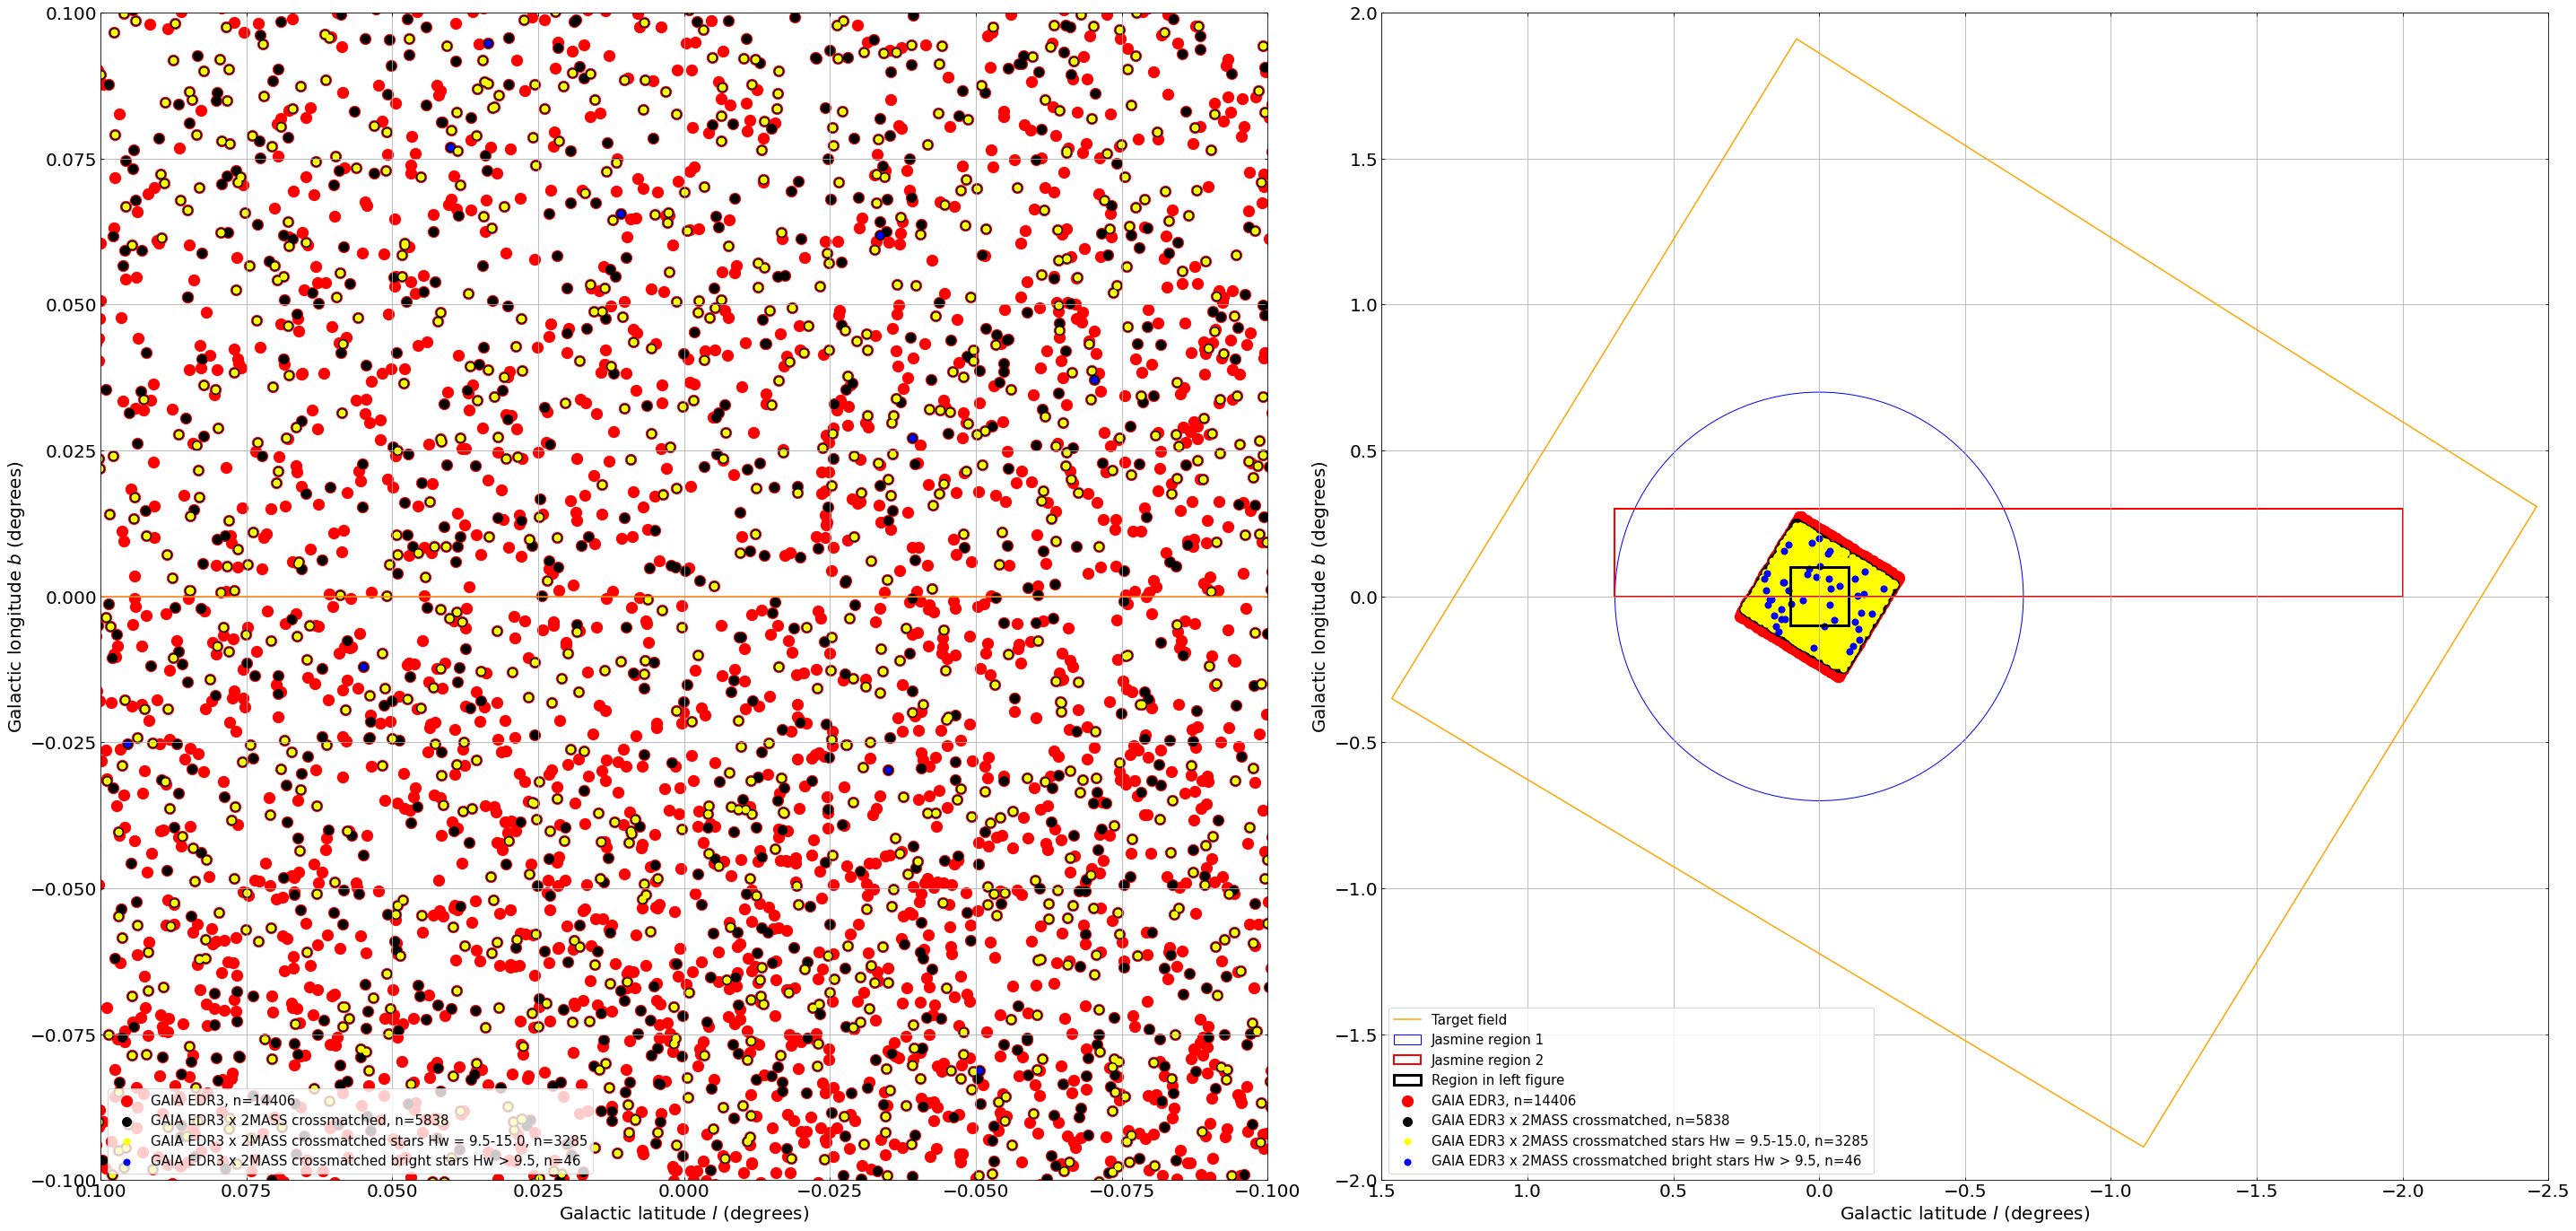

In [24]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import QTable

import numpy as np
import matplotlib.pyplot as pp
import matplotlib.patches as patches

region1 = [[0.7, 0.7, -0.7, -0.7, 0.7],[0.7, -0.7, -0.7, 0.7, 0.7]] # galactic coordinate (l, b)
region2 = [[-2, -2, 0.7, 0.7, -2],[0, 0.3, 0.3 ,0, 0]] # galactic coordinate (l, b)

lcenter = -0.5
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree]
width = 3
height = 3
sky1 = [[sky_org[0]-width/2, sky_org[0]-width/2, sky_org[0]+width/2, sky_org[0]+width/2, sky_org[0]-width/2], 
    [sky_org[1]-height/2, sky_org[1]+height/2, sky_org[1]+height/2, sky_org[1]-height/2, sky_org[1]-height/2]]

sky1_radec = SkyCoord(ra=sky1[0]*u.degree, dec=sky1[1]*u.degree, frame='icrs')
sky1_l = sky1_radec.galactic.l.degree
sky1_b = sky1_radec.galactic.b.degree
sky1_l = np.where(sky1_l>180, sky1_l-360, sky1_l)

####

fig = pp.figure(figsize=(40,20))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
ax1.grid(True)
ax1.set_aspect('equal')

drange=0.1
ax1.set_xlim(drange,-drange)
ax1.set_ylim(-drange,drange)
ax1.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
ax1.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

r2 = patches.Circle(xy=(0,0), radius=0.7, fill=False)
ax1.add_patch(r2)
ax1.plot(region1[0],region1[1])
ax1.plot(region2[0],region2[1])
ax1.plot(sky1_l, sky1_b)

ax2.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
ax2.grid(True)
ax2.set_aspect('equal')
ax2.set_xlim(1.5,-2.5)
ax2.set_ylim(-2,2)
ax2.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
ax2.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

r1 = patches.Circle(xy=(0,0), radius=0.7, fill=False, color="blue", label="Jasmine region 1")
ax2.add_patch(r1)
r2 = patches.Rectangle(xy=(-2,0), height=0.3, width=2.7, fill=False, color="red", lw=2, label="Jasmine region 2")
ax2.add_patch(r2)
#ax2.plot(region1[0],region1[1])
#ax2.plot(region2[0],region2[1], color="red", label="Jasmine region 2")
ax2.plot(sky1_l, sky1_b, "orange", label="Target field")

###

# ax1.scatter(obj_l_galacticnucleus, obj_b_galacticnucleus, s=150, c="Magenta", label="GALACTICNUCLEUS, n="+str(len(obj_l2)))
# ax1.scatter(pd_sirius_jsky["l"],pd_sirius_jsky["b"], s=125, c="red", label="Sirius, n="+str(len(pd_sirius_jsky)))
# ax1.scatter(pd_vvv["GLON"],pd_vvv["GLAT"], s=100, c="green", label="VVV, n="+str(len(pd_vvv)))
# ax1.scatter(pd_2mass["GLON"],pd_2mass["GLAT"], s=75, c="blue", label="2MASS, n="+str(len(pd_2mass)))
ax1.scatter(pd_gaiaedr3["GLON"], pd_gaiaedr3["GLAT"], s=150, c="red", label="GAIA EDR3, n="+str(len(pd_gaiaedr3)))
ax1.scatter(pd_gaia2mass_jsky["l"], pd_gaia2mass_jsky["b"], s=100, c="black", label="GAIA EDR3 x 2MASS crossmatched, n="+str(len(pd_gaia2mass_jsky)))
ax1.scatter(obj_l_gaia2mass_jsky_t, obj_b_gaia2mass_jsky_t, s=50, c="yellow", label="GAIA EDR3 x 2MASS crossmatched stars Hw = 9.5-15.0, n="+str(len(obj_l_gaia2mass_jsky_t)))
ax1.scatter(obj_l_gaia2mass_jsky_b, obj_b_gaia2mass_jsky_b, s=50, c="blue", label="GAIA EDR3 x 2MASS crossmatched bright stars Hw > 9.5, n="+str(len(obj_l_gaia2mass_jsky_b)))
# ax1.scatter(obj_l_gsc, obj_b_gsc, s=25, c="orange", label="GCS2.3, n="+str(len(obj_l1)))

# ax2.scatter(pd_gln["RAJ2000"], pd_gln["DEJ2000"], s=150, c="Magenta", label="GALACTICNUCLEUS")
# ax2.scatter(obj_l_galacticnucleus, obj_b_galacticnucleus, s=150, c="Magenta", label="GALACTICNUCLEUS, n="+str(len(obj_l2)))
# ax2.scatter(pd_sirius_jsky["l"],pd_sirius_jsky["b"], s=125, c="red", label="Sirius, n="+str(len(pd_sirius_jsky)))
# ax2.scatter(pd_vvv["GLON"],pd_vvv["GLAT"], s=100, c="green", label="VVV, n="+str(len(pd_vvv)))
# ax2.scatter(pd_2mass["GLON"],pd_2mass["GLAT"], s=75, c="blue", label="2MASS, n="+str(len(pd_2mass)))
ax2.scatter(pd_gaiaedr3["GLON"], pd_gaiaedr3["GLAT"], s=150, c="red", label="GAIA EDR3, n="+str(len(pd_gaiaedr3)))
ax2.scatter(pd_gaia2mass_jsky["l"], pd_gaia2mass_jsky["b"], s=100, c="black", label="GAIA EDR3 x 2MASS crossmatched, n="+str(len(pd_gaia2mass_jsky)))
ax2.scatter(obj_l_gaia2mass_jsky_t, obj_b_gaia2mass_jsky_t, s=50, c="yellow", label="GAIA EDR3 x 2MASS crossmatched stars Hw = 9.5-15.0, n="+str(len(obj_l_gaia2mass_jsky_t)))
ax2.scatter(obj_l_gaia2mass_jsky_b, obj_b_gaia2mass_jsky_b, s=50, c="blue", label="GAIA EDR3 x 2MASS crossmatched bright stars Hw > 9.5, n="+str(len(obj_l_gaia2mass_jsky_b)))
# ax2.scatter(obj_l_gsc, obj_b_gsc, s=25, c="orange", label="GSC2.3, n="+str(len(obj_l1)))

###

zr = patches.Rectangle(xy=(-drange,-drange), height=drange*2, width=drange*2, fill=False, color="black", lw=3, label="Region in left figure")
ax2.add_patch(zr)

ax1.legend(loc="lower left", fontsize=15)
ax2.legend(loc="lower left", fontsize=15)

fig.tight_layout()
pp.show()
#fig.savefig("fov_lb.png")